**Artifical Neural Network on Keras**
# Oğuzhan Özer
<font color='red'><br> Content

* [Introduction:](#1)
* [Loading the Data Set:](#2)
* [Import Library:](#3)
* [Train Test Split](#4)
* [Implementing with Keras:](#5)
* [Compilation:](#6) 
* [Trainig:](#7) 
* [Detect Accuracy variances:](#8) 

<a id="1"></a> <br>
# Introduction
* We will be working on digit number dataset by implementing with Keras using Convolutional Neural Network in this notebook.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# standart data tools
import numpy as np
import pandas as pd

# common visualizing tools
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings("ignore")

# Any results you write to the current directory are saved as output.

['Sign-language-digits-dataset']


<a id="2"></a> <br>
# Loading the Data Set
* In this part we load and visualize the data.

In [2]:
X_train = np.load("../input/Sign-language-digits-dataset/X.npy")
Y_train = np.load("../input/Sign-language-digits-dataset/Y.npy")

<a id="3"></a> <br>
# Import Library
* In this part we import library that required for keras

In [3]:
# CNN layers and the Deep Learning model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense , Flatten, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# splitting tool for the validation set
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


<a id="4"></a> <br>
# Train Test Split
* We split the data into train and test sets.
    * test size is 20%.
    * train size is 80%.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=42)
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

<a id="5"></a> <br>
# Implementing with Keras

In [5]:
model_sign_lang = Sequential()

model_sign_lang.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
model_sign_lang.add(MaxPooling2D(pool_size=(2,2)))

model_sign_lang.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
model_sign_lang.add(MaxPooling2D(pool_size=(2,2)))
model_sign_lang.add(Dropout(0.25))

model_sign_lang.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"))
model_sign_lang.add(MaxPooling2D(pool_size=(2,2)))
model_sign_lang.add(Dropout(0.25))

model_sign_lang.add(Conv2D(filters=32,kernel_size=(2,2),activation="relu",padding="same"))
model_sign_lang.add(MaxPooling2D(pool_size=(2,2)))
model_sign_lang.add(Dropout(0.25))

model_sign_lang.add(Flatten())

model_sign_lang.add(Dense(128,activation="relu"))
model_sign_lang.add(Dense(64,activation="relu"))
model_sign_lang.add(Dense(30,activation="relu"))
model_sign_lang.add(Dense(10,activation="softmax"))

model_sign_lang.compile(optimizer=Adam(lr=0.0002),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])
    
model_sign_lang.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)    

<a id="6"></a> <br>
# Compilation 

In [6]:
model_sign_lang.compile(optimizer=Adam(lr=0.0002),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

<a id="7"></a> <br>
# Training  

In [7]:
results = model_sign_lang.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1649 samples, validate on 413 samples
Epoch 1/100
1649/1649 [==============================] - 7s 4ms/step - loss: 2.3101 - acc: 0.1043 - val_loss: 2.3034 - val_acc: 0.0993
Epoch 2/100
1649/1649 [==============================] - 6s 4ms/step - loss: 2.3046 - acc: 0.0910 - val_loss: 2.3038 - val_acc: 0.0920
Epoch 3/100
1649/1649 [==============================] - 6s 4ms/step - loss: 2.3040 - acc: 0.1001 - val_loss: 2.3027 - val_acc: 0.0969
Epoch 4/100
1649/1649 [==============================] - 6s 4ms/step - loss: 2.3010 - acc: 0.1116 - val_loss: 2.3027 - val_acc: 0.0775
Epoch 5/100
1649/1649 [==============================] - 6s 4ms/step - loss: 2.3020 - acc: 0.1146 - val_loss: 2.3027 - val_acc: 0.0847
Epoch 6/100
1649/1649 [==============================] - 6s 4ms/step - loss: 2.3024 - acc: 0.0934 - val_loss: 2.3019 - val_acc: 0.0993
Epoch 7/100
1649/1649 [==============================] - 6s 4ms/step - loss: 2.3002 - acc: 0.11

<a id="8"></a> <br>
# Detect Accuracy variances

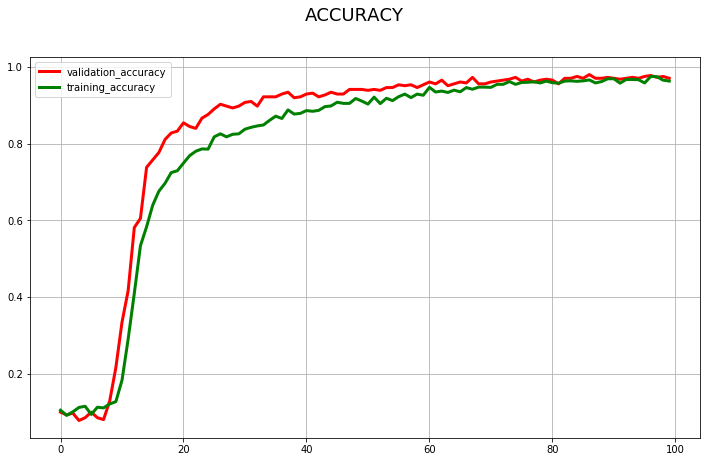

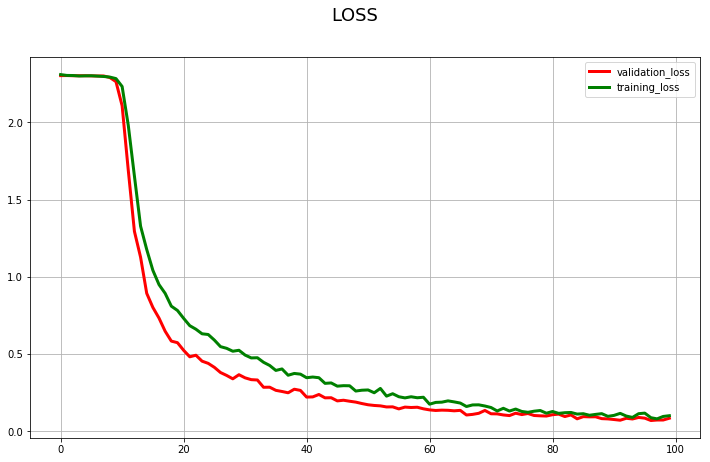

In [8]:
plt.figure(figsize=(12,7))

plt.suptitle("ACCURACY",fontsize=18)

plt.plot(results.history["val_acc"],label="validation_accuracy",c="red",linewidth=3)
plt.plot(results.history["acc"],label="training_accuracy",c="green",linewidth=3)
plt.legend()
plt.grid(True)

plt.show()

plt.figure(figsize=(12,7))
plt.plot(results.history["val_loss"],label="validation_loss",c="red",linewidth=3)
plt.plot(results.history["loss"],label="training_loss",c="green",linewidth=3)
plt.legend()
plt.grid(True)

plt.suptitle("LOSS",fontsize=18)
plt.show()
